# **DATA ANALYSIS AND PREDICTING COVID-19 VACCINATIONS**



Aathira Nair 18blc1003

---
Divyam Sachan 18blc1020

---

Ritika 18blc1027

---


# Understanding Dataset


In [ ]:
import numpy as np
import datetime
import pandas as pd 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from collections import Counter
import missingno as msno
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import normalize
from sklearn.preprocessing import OrdinalEncoder
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
df = pd.read_csv('country_vaccinations.csv')
df1=df.copy
df.shape

(19116, 15)

In [ ]:
print("Dates in the dataset range from {0} to {1}".format(df['date'].min(), df['date'].max()))

Dates in the dataset range from 2020-12-02 to 2021-05-19


In [ ]:
df.tail(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
19111,Zimbabwe,ZWE,2021-05-15,793311.0,579769.0,213542.0,18070.0,19353.0,5.34,3.90,1.44,1302.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1395107134...
19112,Zimbabwe,ZWE,2021-05-16,796947.0,581615.0,215332.0,3636.0,16101.0,5.36,3.91,1.45,1083.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1395107134...
19113,Zimbabwe,ZWE,2021-05-17,814258.0,591808.0,222450.0,17311.0,17658.0,5.48,3.98,1.50,1188.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1395107134...
19114,Zimbabwe,ZWE,2021-05-18,831954.0,600579.0,231375.0,17696.0,17455.0,5.60,4.04,1.56,1174.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1395107134...
19115,Zimbabwe,ZWE,2021-05-19,844684.0,605556.0,239128.0,12730.0,16331.0,5.68,4.07,1.61,1099.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1395107134...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19116 entries, 0 to 19115
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              19116 non-null  object 
 1   iso_code                             19116 non-null  object 
 2   date                                 19116 non-null  object 
 3   total_vaccinations                   10938 non-null  float64
 4   people_vaccinated                    10197 non-null  float64
 5   people_fully_vaccinated              7801 non-null   float64
 6   daily_vaccinations_raw               9117 non-null   float64
 7   daily_vaccinations                   18903 non-null  float64
 8   total_vaccinations_per_hundred       10938 non-null  float64
 9   people_vaccinated_per_hundred        10197 non-null  float64
 10  people_fully_vaccinated_per_hundred  7801 non-null   float64
 11  daily_vaccinations_per_milli

In [ ]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                      8178
people_vaccinated                       8919
people_fully_vaccinated                11315
daily_vaccinations_raw                  9999
daily_vaccinations                       213
total_vaccinations_per_hundred          8178
people_vaccinated_per_hundred           8919
people_fully_vaccinated_per_hundred    11315
daily_vaccinations_per_million           213
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

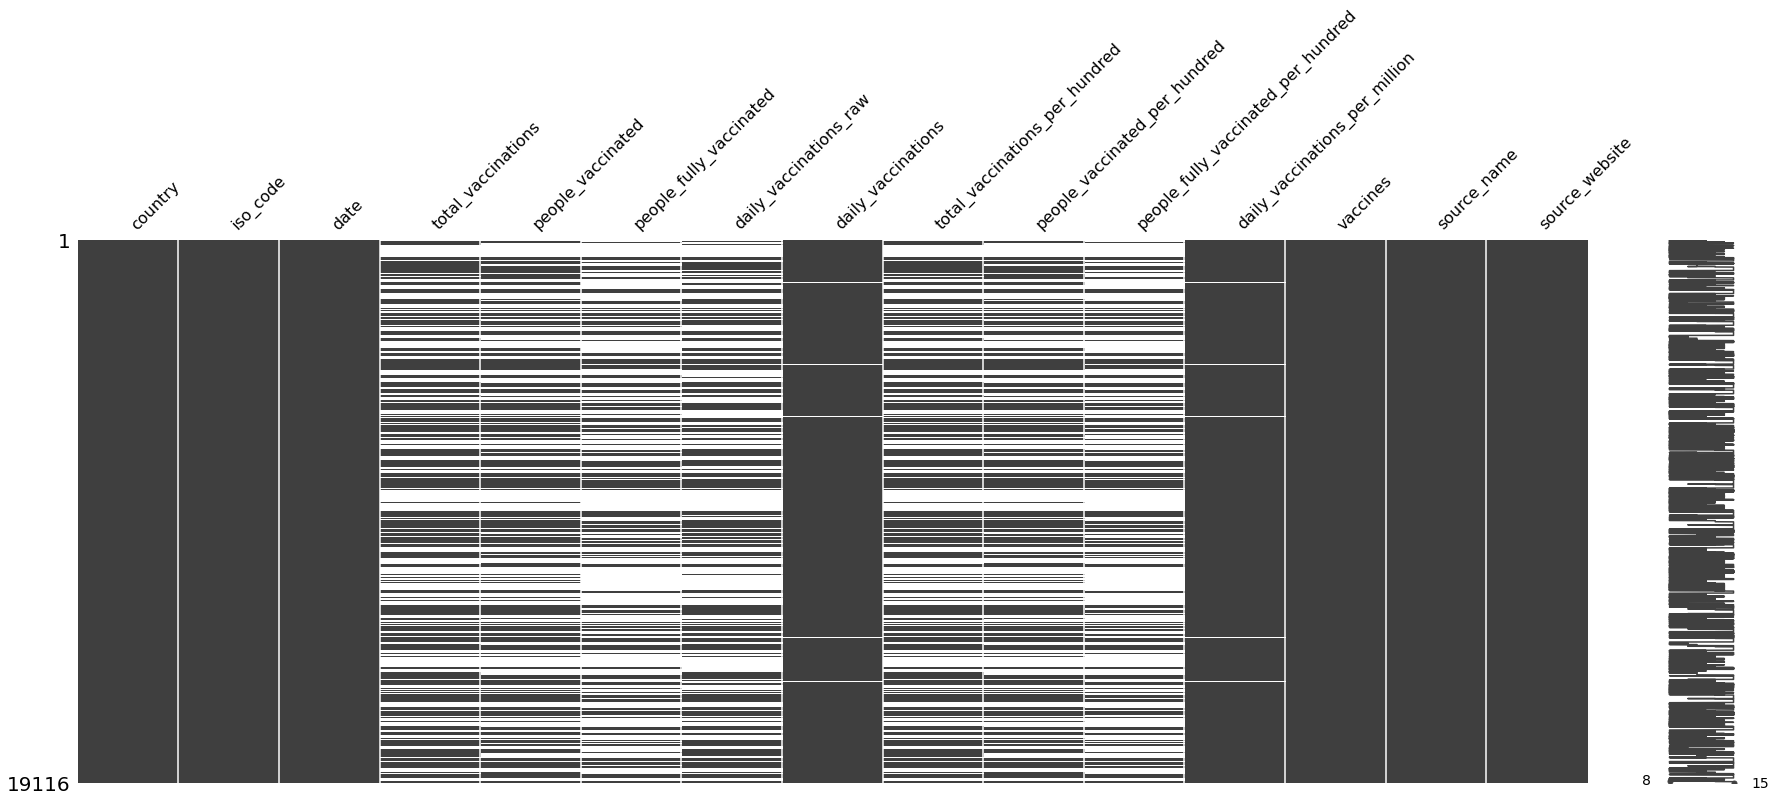

In [ ]:
#missingno
msno.matrix(df, figsize=(30,10))

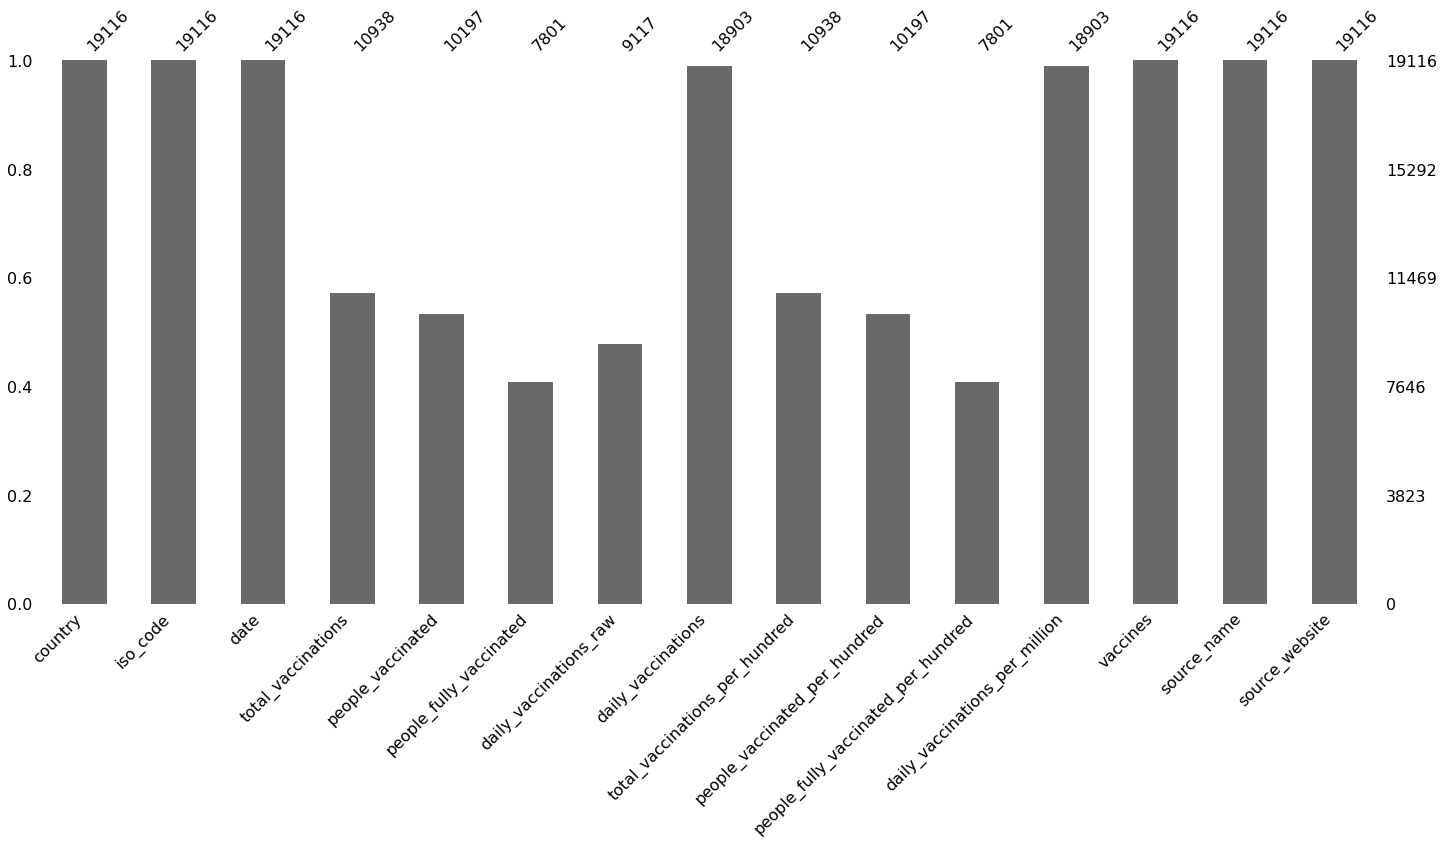

In [ ]:
msno.bar(df) 

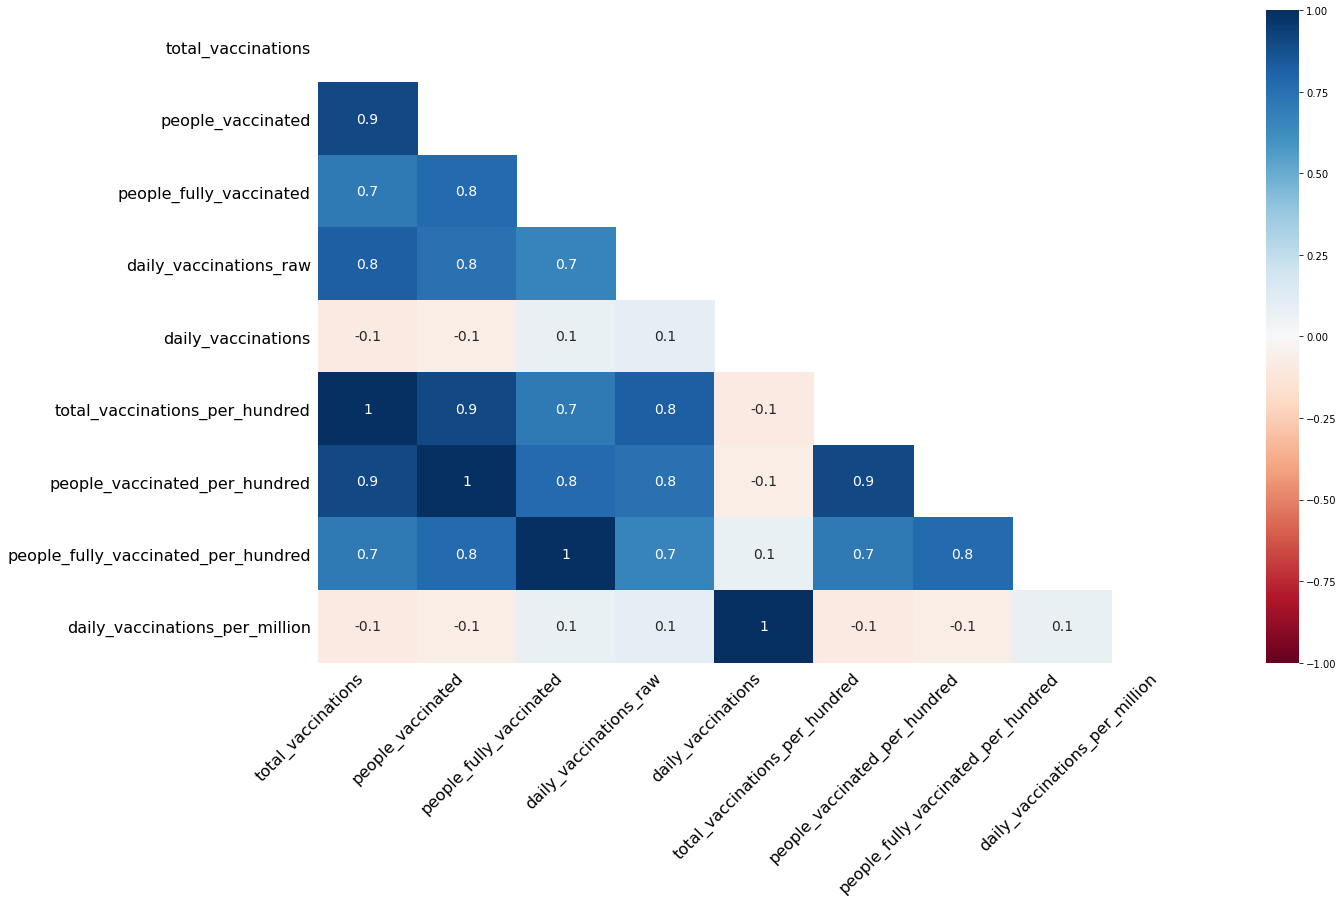

In [ ]:
msno.heatmap(df) 

In [ ]:
df.describe(include='all')

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
count,19116,19116,19116,1.093800e+04,1.019700e+04,7.801000e+03,9.117000e+03,1.890300e+04,10938.000000,10197.000000,7801.000000,18903.000000,19116,19116,19116
unique,211,211,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,101,167
top,Norway,NOR,2021-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,Ministry of Health,https://covid19.who.int/
freq,168,168,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3406,6029,1355
mean,NaN,NaN,NaN,6.161221e+06,3.671225e+06,1.943615e+06,1.522265e+05,8.108267e+04,18.229080,12.969545,6.851507,3085.363910,NaN,NaN,NaN
std,NaN,NaN,NaN,2.636171e+07,1.377522e+07,8.408562e+06,6.746436e+05,4.297460e+05,25.655246,16.552259,11.007071,4718.019742,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,6.954225e+04,5.882900e+04,2.625600e+04,3.301000e+03,8.250000e+02,1.630000,1.500000,0.730000,343.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.985180e+05,3.833460e+05,2.046660e+05,1.715200e+04,5.857000e+03,7.700000,6.030000,2.850000,1523.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.304387e+06,1.586911e+06,8.125830e+05,6.766900e+04,3.005350e+04,24.387500,18.070000,8.060000,4210.500000,NaN,NaN,NaN


# Data Preprocessing and Visualization

In [ ]:
#Showing Country name without duplicates.
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Polynesia', '

In [ ]:
#Removing England,Wales,Northern Ireland and Scotland from country column because they all come under UK(United Kingdom).
df=df[df['country'].apply(lambda x: x not in ['England','Wales','Northern Ireland','Scotland'])]
#Making a list to store the total occurence of each country in our dataset.
l=[]
for i in range(len(df['country'].value_counts())):
    l.append(df['country'].value_counts()[i])

In [ ]:
#Making a piechart inorder to show the total occurence of each unique country in our dataset.
fig = px.pie(df, values=l, names=df['country'].value_counts().index)
fig.update_traces(textposition='inside', textfont_size=14)
fig.show()

In [ ]:
# Converting Date column to date type and fill Missing Value
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [ ]:
#Bar graph
def bars(data, x, y, title, figsize=(20, 12), rotation=75, size=8, width=None, height=None, colour=None):
    count = pd.DataFrame({x:data[x], y:data[y]}).sort_values(ascending=False, by=y)
    if not colour == None:
        c = count[colour]
    else:
        c = None
    fig = px.bar(count, x=x, y=y, title=title, width=width, height=height, color=c)
    fig.show()
#pie chart
def pie(data, x, y, title):
    data = pd.DataFrame({x:data.keys(), y:data.values()}).sort_values(ascending=False, by=y)
    fig = px.pie(data, values=y, names=x)
    fig.show()
    

In [ ]:
#sources
count = Counter(df['source_name'])
count = pd.DataFrame({'name':count.keys(), 'value':count.values()})
count = count[count['value']>50]
count

,name,value
0,World Health Organization,1355
1,Ministry of Health,6029
2,Government of Andorra,106
3,Government of Aruba,52
4,Government of Australia via covidlive.com.au,93
...,...,...
94,National Emergency Crisis and Disaster Managem...,135
95,Government of the United Kingdom,136
96,Centers for Disease Control and Prevention,151
98,Government of Venezuela,92


In [ ]:
bars(count, x='name', y='value', title='Data Provided by Sources', width=800, height=600, colour='value')

In [ ]:
#Which vaccine is most popular
count1 = Counter(df['vaccines'])
count1 = pd.Series(count1).sort_values(ascending=False)[:10]
count1 = dict(zip(count1.keys(), count1))
count1

{'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech': 2520,
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech': 1109,
 'Moderna, Pfizer/BioNTech': 1010,
 'Oxford/AstraZeneca': 3406,
 'Oxford/AstraZeneca, Pfizer/BioNTech': 1490,
 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V': 832,
 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac': 950,
 'Oxford/AstraZeneca, Sinopharm/Beijing': 809,
 'Pfizer/BioNTech': 1261,
 'Sputnik V': 420}

In [ ]:
print('10 most used vaccine combinations')
pie(count1, 'vaccine', 'days using vaccine', '10 most used vaccine combinations')

10 most used vaccine combinations


In [ ]:
#Which countries are the most vaccinated?
top_total_vaccinations = df.groupby('country').people_vaccinated.max().sort_values(ascending=False)
total_vaccinations_f = top_total_vaccinations.dropna(axis=0).reset_index()
print('Vaccinated countries in decreasing order:')
total_vaccinations_f

Vaccinated countries in decreasing order:


,country,people_vaccinated
0,United States,159174963.0
1,India,145333606.0
2,Brazil,37376193.0
3,United Kingdom,36985505.0
4,Germany,31741349.0
...,...,...
202,Central African Republic,667.0
203,Saudi Arabia,0.0
204,China,0.0
205,Algeria,0.0


In [ ]:
fig1 = go.Figure(data=[go.Pie(labels=total_vaccinations_f['country'][0:10], values=total_vaccinations_f['people_vaccinated'][0:10],title='Top 10 vaccinated counties')])
fig1.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = total_vaccinations_f['country'],
    z = total_vaccinations_f['people_vaccinated'],
    text = total_vaccinations_f['people_vaccinated'],
   # colorscale=colors,
    autocolorscale=True,
    reversescale=False,
    colorbar_title = 'Total of daily vaccinations',
))

fig.update_layout(
    title_text='Total number of People Vaccinated',
    geo=dict(
        showcoastlines=True,
    ),
)

In [ ]:
#Which countries have the most effective vaccination programme?
top_daily = df.groupby('country').daily_vaccinations.max().sort_values(ascending=False)
top_daily_f = top_daily.dropna(axis='rows').reset_index()
top_daily_f

,country,daily_vaccinations
0,China,13605571.0
1,India,3659357.0
2,United States,3384387.0
3,Brazil,1135847.0
4,Germany,800534.0
...,...,...
202,Tajikistan,0.0
203,Bonaire Sint Eustatius and Saba,0.0
204,Central African Republic,0.0
205,Guinea-Bissau,0.0


In [ ]:
fig = px.bar(top_daily_f[0:10], y="daily_vaccinations",color='daily_vaccinations', x="country",title='Country vs Total daily vaccinations')
fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = top_daily_f['country'],
    z = top_daily_f['daily_vaccinations'],
    text = top_daily_f['daily_vaccinations'],
   # colorscale=colors,
    autocolorscale=True,
    reversescale=False,
    colorbar_title = 'Total of daily vaccinations',
))

fig.update_layout(
    title_text='Total of daily vaccinations by each country',
    geo=dict(
        showcoastlines=True,
    ),
)

In [ ]:
#total vaccination per hundred
total_vaccinations_per_h = df.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False)[:15]
total_vaccinations_per_h  = total_vaccinations_per_h.dropna(axis='rows').reset_index()
total_vaccinations_per_h

,country,total_vaccinations_per_hundred
0,Gibraltar,223.15
1,Seychelles,133.77
2,Falkland Islands,126.53
3,Israel,121.81
4,San Marino,121.41
5,United Arab Emirates,118.34
6,Saint Helena,116.80
7,Cayman Islands,114.55
8,Bermuda,106.89
9,Malta,99.12


In [ ]:
fig3 = px.bar(total_vaccinations_per_h, y='total_vaccinations_per_hundred', x='country', text='total_vaccinations_per_hundred')
fig3.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig3.show()

# India

In [ ]:
ind = df[df['country'] == 'India']
ind.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
ind.loc[:, 'people_fully_vaccinated'].fillna(0.0, inplace = True)
ind.loc[:, 'people_fully_vaccinated_per_hundred'].fillna(0.0, inplace = True)
ind.loc[:, 'daily_vaccinations_raw'].fillna(0.0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Selecting particular columns and taking data as index for better visualisation 
def GroupByDay(df, function = np.mean):
    grouped = df[['date', 'total_vaccinations','people_vaccinated_per_hundred', 'people_fully_vaccinated', 'people_vaccinated', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_raw','daily_vaccinations']].groupby('date')
    daily = grouped.aggregate(function)
    daily['date'] = daily.index
    return daily

In [ ]:
#Picking country India from Dataset and applying the above function
ind = df[df['country'] == 'India']
dailies = GroupByDay(ind)
ind_df = pd.DataFrame(dailies)
ind_df.dropna(0, inplace = True)
ind_df.tail(5)

,total_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated,people_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations_raw,daily_vaccinations,date
date,,,,,,,,
2021-05-15,181544536.0,10.23,40412424.0,141132112.0,2.93,1898123.0,2007240.0,2021-05-15
2021-05-16,182251006.0,10.27,40486671.0,141764335.0,2.93,706470.0,1992305.0,2021-05-16
2021-05-17,183817204.0,10.37,40726986.0,143090218.0,2.95,1566198.0,1816898.0,2021-05-17
2021-05-18,185191602.0,10.45,40921402.0,144270200.0,2.97,1374398.0,1618423.0,2021-05-18
2021-05-19,186410600.0,10.53,41076994.0,145333606.0,2.98,1218998.0,1480718.0,2021-05-19


In [ ]:
#Daily Vaccinations
fig1=go.Figure()
fig1.add_trace(go.Scatter(x=ind_df['date'],y=ind_df['daily_vaccinations'],name="daily_vaccinations", mode='lines+markers'))
fig1.update_layout(title="India's Daily Vaccinations",yaxis_title="daily_vaccinations", xaxis_title="Date")
fig1.show()

In [ ]:
#Total Vaccinations

f = 0 
s = 0
for i in range(len(ind_df['total_vaccinations'])):
  if ind_df['total_vaccinations'][i] == 0 :
    if i != 0 or i != 1:
      ind_df['total_vaccinations'][i] = (f+s)/2
  else:
    f = s
    s = ind_df['total_vaccinations'][i] 

fig1=go.Figure()
fig1.add_trace(go.Scatter(x=ind_df['date'],y=ind_df['total_vaccinations'],name="total_vaccinations", mode='lines+markers'))
fig1.update_layout(title="Total Vaccinations in India",yaxis_title="total_vaccinations", xaxis_title="Date")
fig1.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#People Vaccinated
f = 0 
s = 0
for i in range(len(ind_df['people_vaccinated'])):
  if ind_df['people_vaccinated'][i] == 0 :
    if i != 0 or i != 1:
      ind_df['people_vaccinated'][i] = (f+s)/2
  else:
    f = s
    s = ind_df['people_vaccinated'][i] 
    
#people_fully_vaccinated
f = 0 
s = 0
for i in range(len(ind_df['people_fully_vaccinated'])):
  if ind_df['people_fully_vaccinated'][i] == 0 :
    if i != 0 or i != 1:
      ind_df['people_fully_vaccinated'][i] = (f+s)/2
  else:
    f = s
    s = ind_df['people_fully_vaccinated'][i] 

fig1=go.Figure()
fig1.add_trace(go.Scatter(x=ind_df['date'],y=ind_df['people_vaccinated'],name="people_vaccinated", mode='lines+markers'))
fig1.add_trace(go.Scatter(x=ind_df['date'],y=ind_df['people_fully_vaccinated'],name="people_fully_vaccinated", mode='lines+markers'))
fig1.update_layout(title="People Vaccinated and People Fully Vaccinated in India",yaxis_title="% Vaccinated", xaxis_title="Date")
fig1.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Training set

In [ ]:
#Splitting the dataset
q = df.groupby(['date'])
X = np.array([i for i in range(len(q))]).reshape(-1, 1)
y = []                # total vaccinations on a day
for i,j in q:
  y.append(j['total_vaccinations'].sum())
y = np.array(y).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = False)

In [ ]:
# Function for plotting prediction graphs
def plot_model_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(8, 5))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Total Vaccinations in the World', size=15)
    plt.xlabel('Days Since 14/12/2020', size=15)
    plt.ylabel('Total Vaccinations', size=15)
    plt.legend(['Total Vaccinations', algo_name], prop={'size': 10})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

In [ ]:
# Adjusting the data for forecasting
days_in_future = 10
future_forcast = np.array([i for i in range(len(X)+days_in_future)]).reshape(-1, 1)
dates_adjusted = future_forcast[:-10]

start_date = '12/02/2020'
start_date__ = datetime.datetime.strptime(start_date, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date__ + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

print(future_forcast_dates)

['12/02/2020', '12/03/2020', '12/04/2020', '12/05/2020', '12/06/2020', '12/07/2020', '12/08/2020', '12/09/2020', '12/10/2020', '12/11/2020', '12/12/2020', '12/13/2020', '12/14/2020', '12/15/2020', '12/16/2020', '12/17/2020', '12/18/2020', '12/19/2020', '12/20/2020', '12/21/2020', '12/22/2020', '12/23/2020', '12/24/2020', '12/25/2020', '12/26/2020', '12/27/2020', '12/28/2020', '12/29/2020', '12/30/2020', '12/31/2020', '01/01/2021', '01/02/2021', '01/03/2021', '01/04/2021', '01/05/2021', '01/06/2021', '01/07/2021', '01/08/2021', '01/09/2021', '01/10/2021', '01/11/2021', '01/12/2021', '01/13/2021', '01/14/2021', '01/15/2021', '01/16/2021', '01/17/2021', '01/18/2021', '01/19/2021', '01/20/2021', '01/21/2021', '01/22/2021', '01/23/2021', '01/24/2021', '01/25/2021', '01/26/2021', '01/27/2021', '01/28/2021', '01/29/2021', '01/30/2021', '01/31/2021', '02/01/2021', '02/02/2021', '02/03/2021', '02/04/2021', '02/05/2021', '02/06/2021', '02/07/2021', '02/08/2021', '02/09/2021', '02/10/2021', '02/1

In [ ]:
#List to store the mae and mse of models
mae_list = []
mse_list = []

# Prediction and Forecasting

## Linear Regression

In [ ]:
#Linear Regression for World
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model = linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, linear_y_pred))
print('MSE: ', mean_squared_error(y_test, linear_y_pred))

MAE:  572879810.3204076
MSE:  3.5585514376237005e+17


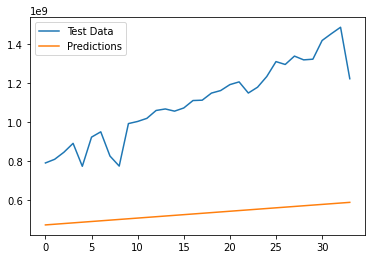

In [ ]:
#Plot for prediction of test data 
plt.plot(y_test)
plt.plot(linear_y_pred)
plt.legend(['Test Data', 'Predictions'])

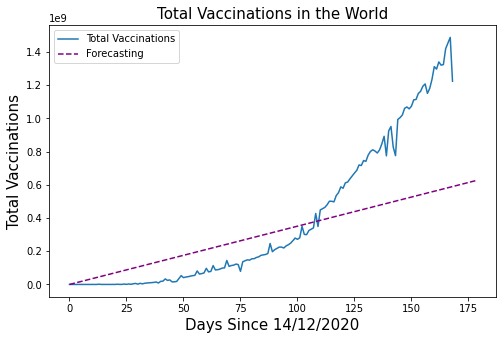

In [ ]:
#forecasting
linear_forec = linear_model.predict(future_forcast)
plot_model_predictions(dates_adjusted, y, linear_forec, 'Forecasting', 'purple')

In [ ]:
# Future predictions 
l = []
for i in linear_forec:
  l1 = i[0]
  l.append(l1)
forec = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Forecasting': np.round(l[-10:])})
forec

,Date,Forecasting
0,05/20/2021,592719109.0
1,05/21/2021,596226323.0
2,05/22/2021,599733537.0
3,05/23/2021,603240750.0
4,05/24/2021,606747964.0
5,05/25/2021,610255178.0
6,05/26/2021,613762391.0
7,05/27/2021,617269605.0
8,05/28/2021,620776819.0
9,05/29/2021,624284032.0


## Polynomial Regerssion

In [ ]:
# transform our data for polynomial regression
poly_ = PolynomialFeatures(degree=3)
poly__x_train = poly_.fit_transform(X_train)
poly__x_test= poly_.fit_transform(X_test)

In [ ]:
# polynomial regression for world
poly_model = LinearRegression(normalize=True, fit_intercept=False)
poly_model.fit(poly__x_train, y_train)
poly_y_pred = poly_model.predict(poly__x_test)
print('MAE:', mean_absolute_error(y_test,poly_y_pred))
print('MSE:',mean_squared_error( y_test,poly_y_pred))

mae_list.append(mean_absolute_error(y_test,poly_y_pred))
mse_list.append(mean_squared_error(y_test,poly_y_pred))

MAE: 190858639.42719617
MSE: 4.924020837028454e+16


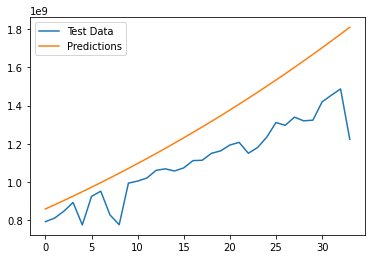

In [ ]:
#Plot for prediction of test data 
plt.plot(y_test)
plt.plot(poly_y_pred)
plt.legend(['Test Data', 'Predictions'])

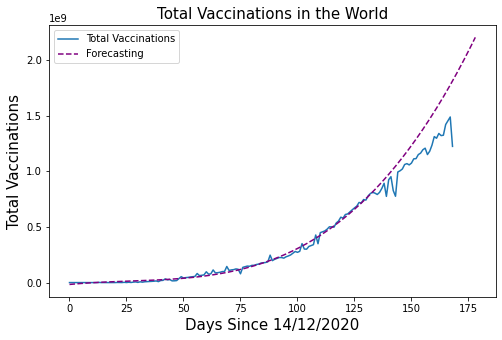

In [ ]:
#forecasting
poly__x_test= poly_.fit_transform(future_forcast)
poly_forec = poly_model.predict(poly__x_test)
plot_model_predictions(dates_adjusted, y, poly_forec, 'Forecasting', 'purple')

In [ ]:
# Future predictions 
l = []
for i in poly_forec:
  l1 = i[0]
  l.append(l1)
forec = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Forecasting': np.round(l[-10:])})
forec

,Date,Forecasting
0,05/20/2021,1.847734e+09
1,05/21/2021,1.885072e+09
2,05/22/2021,1.922923e+09
3,05/23/2021,1.961290e+09
4,05/24/2021,2.000178e+09
5,05/25/2021,2.039588e+09
6,05/26/2021,2.079526e+09
7,05/27/2021,2.119995e+09
8,05/28/2021,2.160998e+09
9,05/29/2021,2.202538e+09


## Bayesian ridge polynomial regression

In [ ]:
#Transforming
bayesian_poly = PolynomialFeatures(degree=3)
bayesian_poly_X_train = bayesian_poly.fit_transform(X_train)
bayesian_poly_X_test = bayesian_poly.fit_transform(X_test)

In [ ]:
#BayesianRidge
bayesian_model = BayesianRidge(normalize=True, fit_intercept=False)
bayesian_model = bayesian_model.fit(bayesian_poly_X_train, y_train)
bayesian_y_pred = bayesian_model.predict(bayesian_poly_X_test)
print('MAE: ', mean_absolute_error(y_test, bayesian_y_pred))
print('MSE: ', mean_squared_error(y_test, bayesian_y_pred))

mae_list.append(mean_absolute_error(y_test,bayesian_y_pred))
mse_list.append(mean_squared_error(y_test,bayesian_y_pred))

MAE:  123959459.13186674
MSE:  2.300927481435901e+16


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



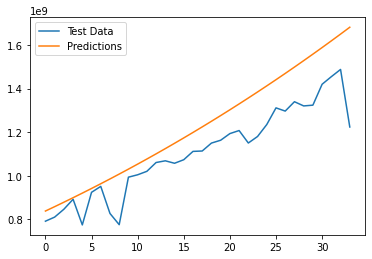

In [ ]:
#Plot for prediction of test data
plt.plot(y_test)
plt.plot(bayesian_y_pred)
plt.legend(['Test Data', 'Predictions'])

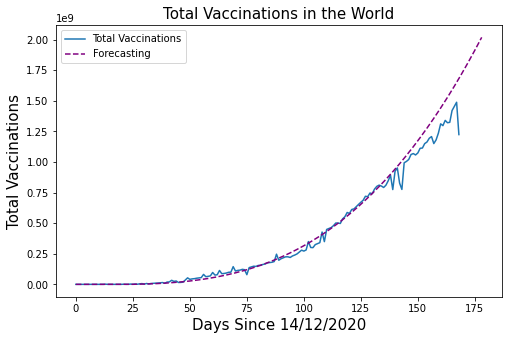

In [ ]:
#forecasting
bayesian_poly_X_test = bayesian_poly.fit_transform(future_forcast)
bayesian_forec = bayesian_model.predict(bayesian_poly_X_test)
plot_model_predictions(dates_adjusted, y, bayesian_forec, 'Forecasting', 'purple')

In [ ]:
# Future predictions 
forec = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Forecasting': np.round(bayesian_forec[-10:])})
forec

,Date,Forecasting
0,05/20/2021,1.712847e+09
1,05/21/2021,1.745077e+09
2,05/22/2021,1.777708e+09
3,05/23/2021,1.810742e+09
4,05/24/2021,1.844181e+09
5,05/25/2021,1.878029e+09
6,05/26/2021,1.912288e+09
7,05/27/2021,1.946960e+09
8,05/28/2021,1.982047e+09
9,05/29/2021,2.017553e+09


## Decision Tree Regressor

In [ ]:
#DecisionTreeRegressor
decision_model = DecisionTreeRegressor(random_state=0)
decision_model = decision_model.fit(X_train, y_train)
decision_y_pred = decision_model.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, decision_y_pred))
print('MSE: ', mean_squared_error(y_test, decision_y_pred))

MAE:  305167438.11764705
MSE:  1.3021052791285158e+17


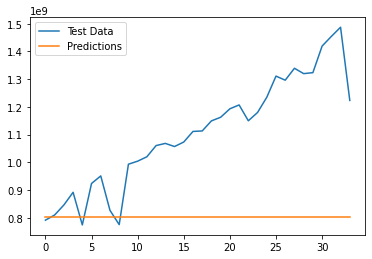

In [ ]:
#Plot for prediction of test data
plt.plot(y_test)
plt.plot(decision_y_pred)
plt.legend(['Test Data', 'Predictions'])

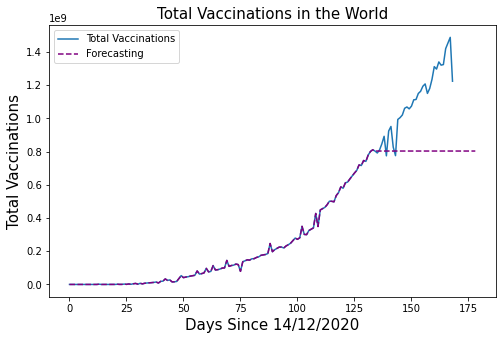

In [ ]:
#forecasting
decision_forec = decision_model.predict(future_forcast)
plot_model_predictions(dates_adjusted, y, decision_forec, 'Forecasting', 'purple')

In [ ]:
# Future predictions 
forec = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Forecasting': np.round(decision_forec[-10:])})
forec

,Date,Forecasting
0,05/20/2021,803083324.0
1,05/21/2021,803083324.0
2,05/22/2021,803083324.0
3,05/23/2021,803083324.0
4,05/24/2021,803083324.0
5,05/25/2021,803083324.0
6,05/26/2021,803083324.0
7,05/27/2021,803083324.0
8,05/28/2021,803083324.0
9,05/29/2021,803083324.0


## Random Forest

In [ ]:
#Random Forest for World
random_model = RandomForestRegressor(n_estimators = 1000, random_state = 0)
random_model = random_model.fit(X_train, y_train)
random_y_pred = random_model.predict(X_test)

#print('R-Square:', r2_score(y_test, random_y_pred))
print('MAE: ', mean_absolute_error(y_test, random_y_pred))
print('MSE: ', mean_squared_error(y_test, random_y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



MAE:  305786927.155647
MSE:  1.306641499180314e+17


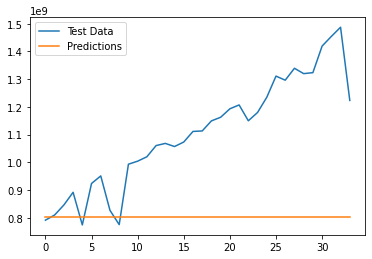

In [ ]:
#Plot for prediction of test data
plt.plot(y_test)
plt.plot(random_y_pred)
plt.legend(['Test Data', 'Predictions'])

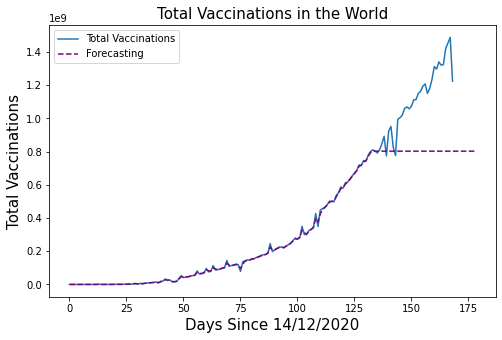

In [ ]:
#Forecasting
rf_fore = random_model.predict(future_forcast)
plot_model_predictions(dates_adjusted, y, rf_fore, 'Forecasting', 'purple')

In [ ]:
# Future predictions
forec = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Forecasting': np.round(rf_fore[-10:])})
forec

,Date,Forecasting
0,05/20/2021,802331087.0
1,05/21/2021,802331087.0
2,05/22/2021,802331087.0
3,05/23/2021,802331087.0
4,05/24/2021,802331087.0
5,05/25/2021,802331087.0
6,05/26/2021,802331087.0
7,05/27/2021,802331087.0
8,05/28/2021,802331087.0
9,05/29/2021,802331087.0


## SVR

In [ ]:
#SVR fro World
svr_model = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svr_model = svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, svr_y_pred))
print('MSE: ', mean_squared_error(y_test, svr_y_pred))

MAE:  982684763.9774959
MSE:  1.0033878464171872e+18


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



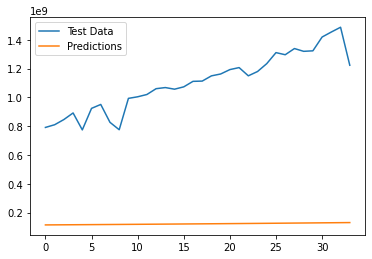

In [ ]:
#Plot for prediction of test data
plt.plot(y_test)
plt.plot(svr_y_pred)
plt.legend(['Test Data', 'Predictions'])

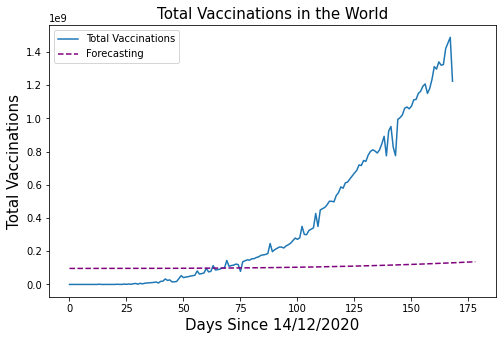

In [ ]:
#Forecasting
svr_fore = svr_model.predict(future_forcast)
plot_model_predictions(dates_adjusted, y, svr_fore, 'Forecasting', 'purple')

In [ ]:
#Future predictions
forec = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Forecasting': np.round(svr_fore[-10:])})
forec

,Date,Forecasting
0,05/20/2021,130860079.0
1,05/21/2021,131475401.0
2,05/22/2021,132098005.0
3,05/23/2021,132727934.0
4,05/24/2021,133365231.0
5,05/25/2021,134009937.0
6,05/26/2021,134662097.0
7,05/27/2021,135321753.0
8,05/28/2021,135988948.0
9,05/29/2021,136663725.0


## K Neighbors Regressor

In [ ]:
#KNeighborsRegressor for World
kvr_model = KNeighborsRegressor(n_neighbors=3)
kvr_model = kvr_model.fit(X_train, y_train)
kvr_y_pred = kvr_model.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, kvr_y_pred))
print('MSE: ', mean_squared_error(y_test, kvr_y_pred))

MAE:  303884575.2941176
MSE:  1.2927474764232174e+17


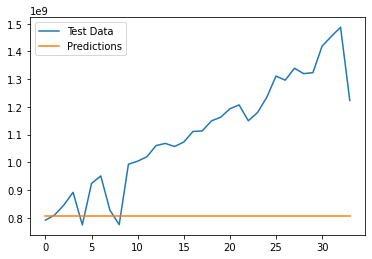

In [ ]:
#Plot for prediction of test data
plt.plot(y_test)
plt.plot(kvr_y_pred)
plt.legend(['Test Data', 'Predictions'])

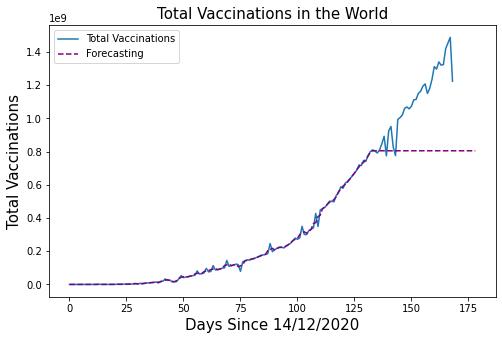

In [ ]:
#Forecasting
kvr_fore = kvr_model.predict(future_forcast)
plot_model_predictions(dates_adjusted, y, kvr_fore, 'Forecasting', 'purple')

In [ ]:
# Future predictions 
l = []
for i in kvr_fore:
  l1 = i[0]
  l.append(l1)
forec = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Forecasting': np.round(l[-10:])})
forec

,Date,Forecasting
0,05/20/2021,804641086.0
1,05/21/2021,804641086.0
2,05/22/2021,804641086.0
3,05/23/2021,804641086.0
4,05/24/2021,804641086.0
5,05/25/2021,804641086.0
6,05/26/2021,804641086.0
7,05/27/2021,804641086.0
8,05/28/2021,804641086.0
9,05/29/2021,804641086.0


## Comparison

In [ ]:
#World
model_names = ['PolynomialRegression','BayesianPolynomialRegression','LinearRegression','SVR','KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor']


for model in [ LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(), RandomForestRegressor()]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    mae_list.append(mae)
    mse_list.append(mse)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
results = pd.DataFrame({'mae':mae_list, 'mse':mse_list})
results.index = model_names
for col in results:
    temp_results = results.sort_values(by=col, ascending=False)
    fig = px.bar(temp_results, temp_results.index, col, title=col, color=results[col])
    fig.show()

# Clustering

In [ ]:
data = df
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [ ]:
ord_enc = OrdinalEncoder()
data['country'] = ord_enc.fit_transform(data[['country']])
data['iso_code'] = ord_enc.fit_transform(data[['iso_code']])
data['date'] = ord_enc.fit_transform(data[['date']])
data['vaccines'] = ord_enc.fit_transform(data[['vaccines']])
data['source_name'] = ord_enc.fit_transform(data[['source_name']])
data['source_website'] = ord_enc.fit_transform(data[['source_website']])
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,0.0,1.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,100.0,25.0
1,0.0,1.0,83.0,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,20.0,100.0,25.0
2,0.0,1.0,84.0,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,20.0,100.0,25.0
3,0.0,1.0,85.0,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,20.0,100.0,25.0
4,0.0,1.0,86.0,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,20.0,100.0,25.0


In [ ]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,0.0,0.007506,0.615481,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.150117,0.750587,0.187647
1,0.0,0.000728,0.060408,0.0,0.0,0.0,0.0,0.994918,0.0,0.0,0.0,0.025473,0.014556,0.072781,0.018195
2,0.0,0.000728,0.061133,0.0,0.0,0.0,0.0,0.994874,0.0,0.0,0.0,0.025472,0.014556,0.072778,0.018194
3,0.0,0.000728,0.061858,0.0,0.0,0.0,0.0,0.994829,0.0,0.0,0.0,0.025471,0.014555,0.072775,0.018194
4,0.0,0.000728,0.062583,0.0,0.0,0.0,0.0,0.994784,0.0,0.0,0.0,0.025470,0.014554,0.072771,0.018193


## Dendrogram with different linkages

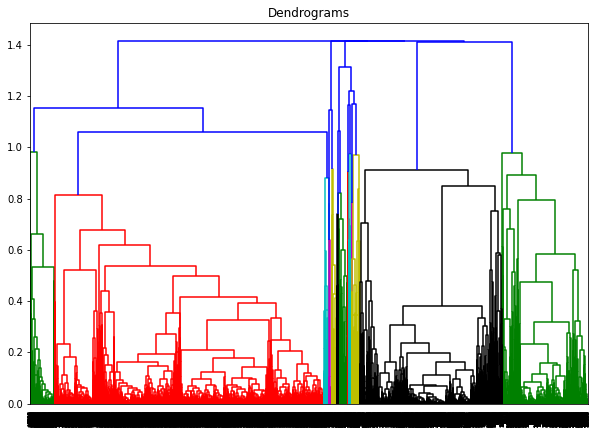

In [ ]:
# Dendrogram with Complete linkages
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))
plt.axhline(y=6, color='r', linestyle='--')

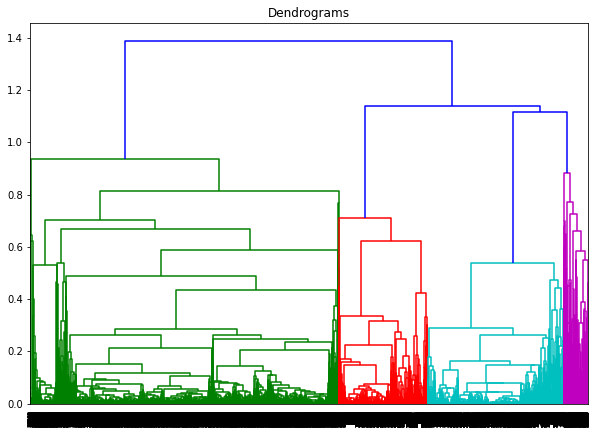

In [ ]:
# Dendrogram with Average linkages
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='average'))
plt.axhline(y=6, color='r', linestyle='--')

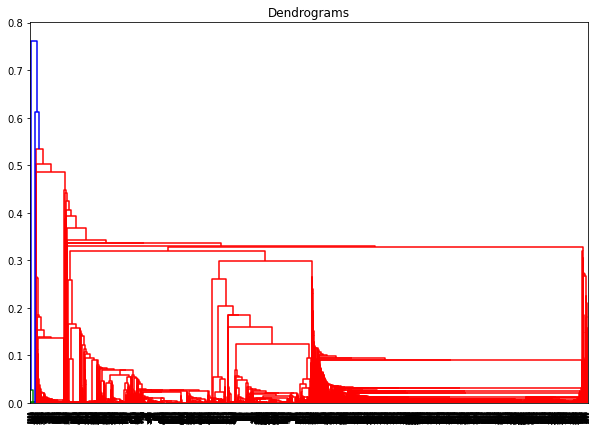

In [ ]:
# Dendrogram with Single linkages
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled[0:5000], method='single'))
plt.axhline(y=6, color='r', linestyle='--')

## K-Means Clustering

In [ ]:
cluster = KMeans(n_clusters=3)  
cluster.fit_predict(data_scaled)

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

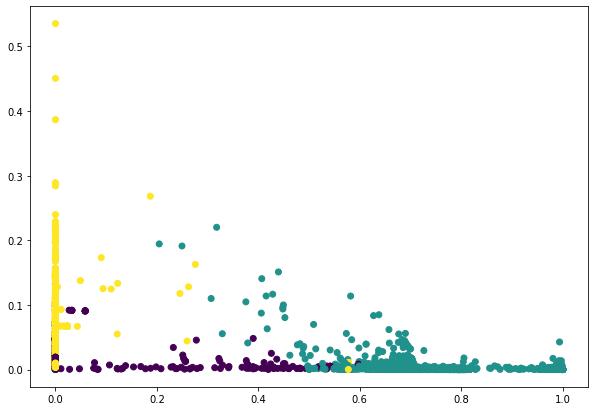

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['total_vaccinations'],data_scaled['vaccines'],  c=cluster.labels_) 



```
# This is formatted as code
```

## Agglomerative clustering with different linkages

### 1. Euclidian

In [ ]:
#Agglomerative with complete linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 1, 1, 1])

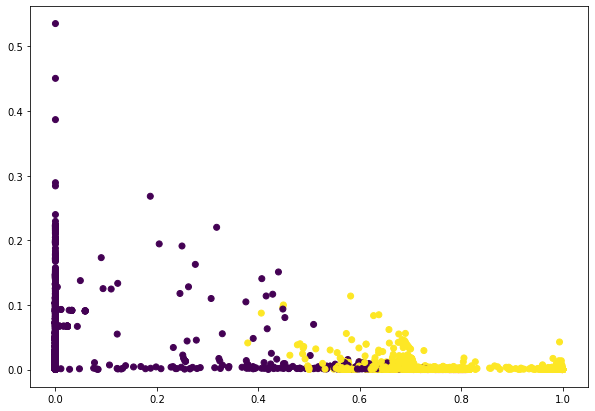

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['total_vaccinations'],data_scaled['vaccines'],  c=cluster.labels_) 

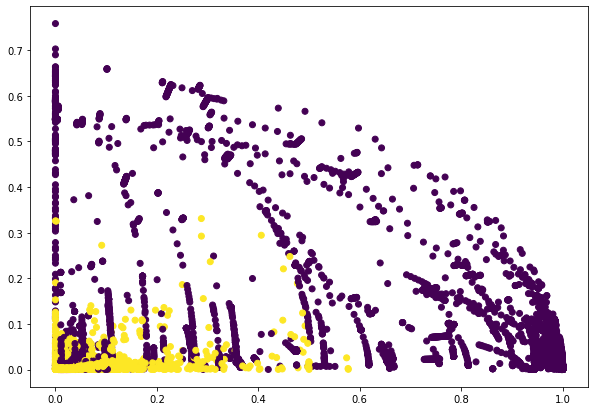

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['daily_vaccinations'],data_scaled['country'],  c=cluster.labels_) 

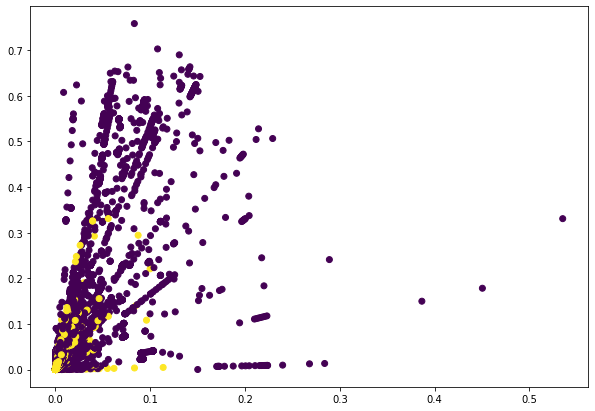

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['vaccines'],data_scaled['country'],  c=cluster.labels_) 

In [ ]:
#Agglomerative with single linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 0, 0, 0])

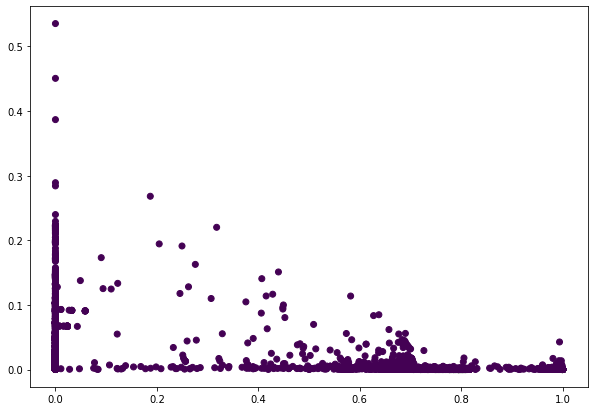

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['total_vaccinations'],data_scaled['vaccines'],  c=cluster.labels_) 

In [ ]:
#Agglomerative with average linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 1, 1, 1])

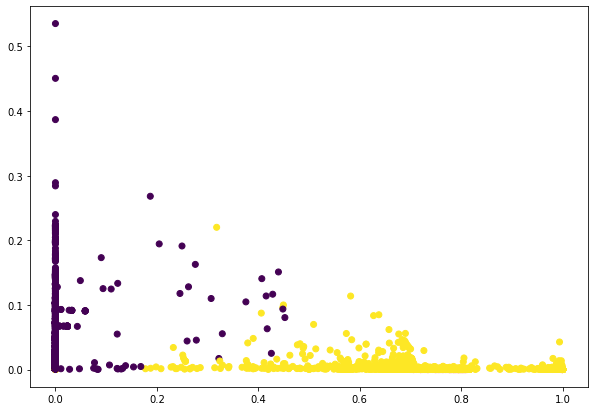

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['total_vaccinations'],data_scaled['vaccines'],  c=cluster.labels_) 

### 2. Manhattan

In [ ]:
#Agglomerative with average linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, ..., 0, 0, 0])

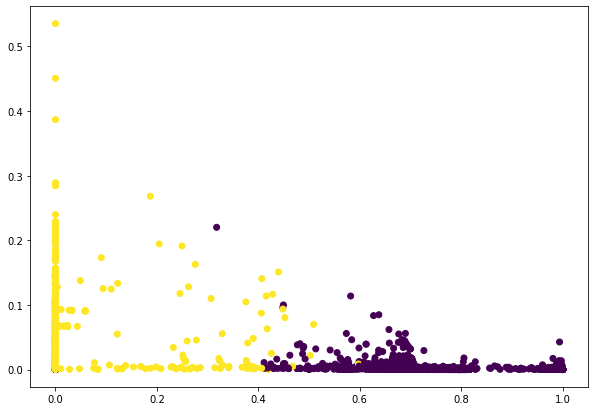

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['total_vaccinations'],data_scaled['vaccines'],  c=cluster.labels_) 

In [ ]:
#Agglomerative with complete linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
cluster.fit_predict(data_scaled)

array([1, 0, 0, ..., 0, 0, 0])

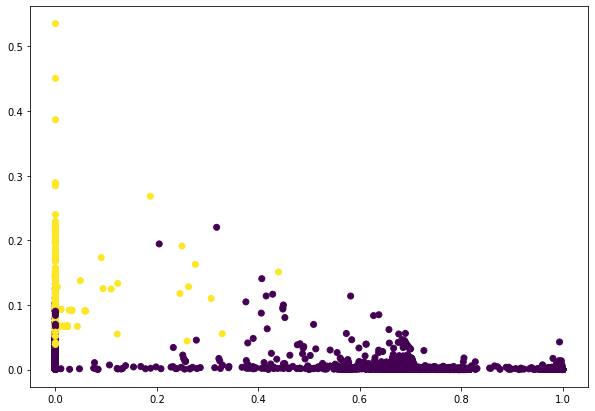

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['total_vaccinations'],data_scaled['vaccines'],  c=cluster.labels_) 

In [ ]:
#Agglomerative with single linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 0, 0, 0])

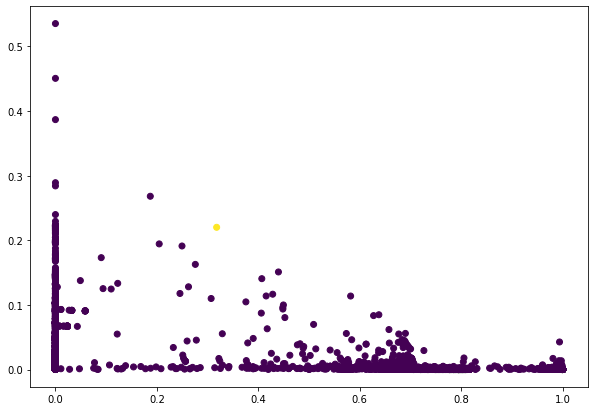

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['total_vaccinations'],data_scaled['vaccines'],  c=cluster.labels_) 

### 3. Cosine

In [ ]:
#Agglomerative with average linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 1, 1, 1])

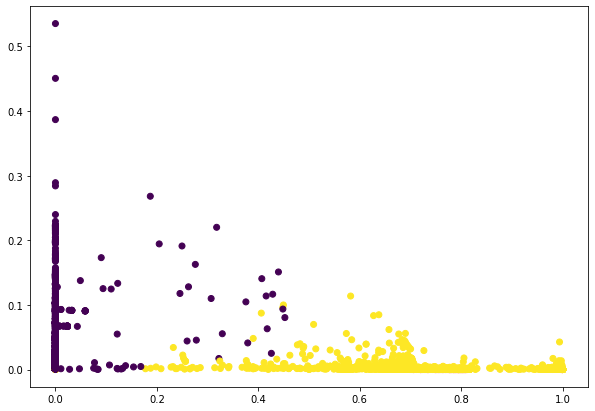

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['total_vaccinations'],data_scaled['vaccines'],  c=cluster.labels_) 

In [ ]:
#Agglomerative with complete linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 1, 1, 1])

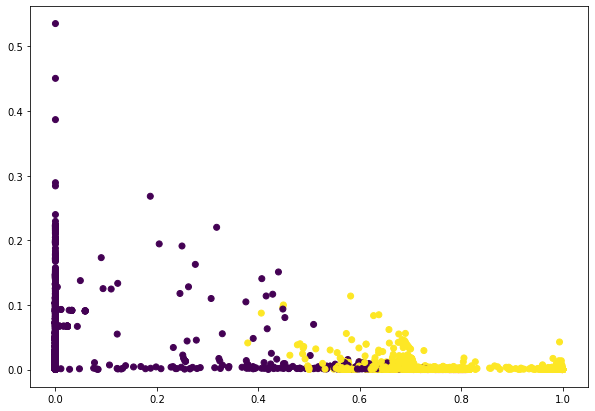

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['total_vaccinations'],data_scaled['vaccines'],  c=cluster.labels_)

In [ ]:
#Agglomerative with single linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 0, 0, 0])

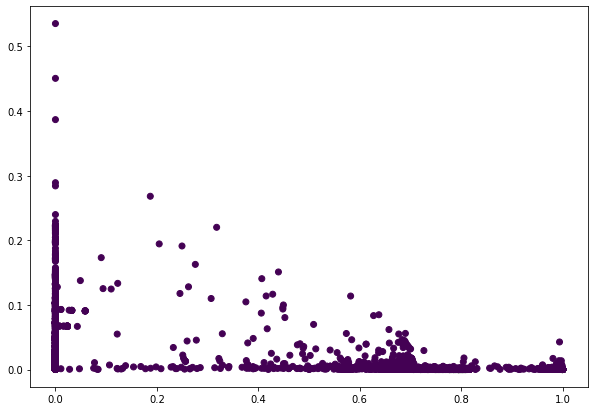

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['total_vaccinations'],data_scaled['vaccines'],  c=cluster.labels_) 